In [66]:
import math
import sympy as sym
from sympy.solvers import solve
import time
import matplotlib.pyplot as plt
from sympy.plotting import plot3d
import numpy as np

Norma 17.08800749063506
Iteracion 1 Puntos: 0.5, 1.5 f(x,y): 16.5000000000000.
Norma 4.891132578841195
Iteracion 2 Puntos: 0.103260869565217, 0.442028985507246 f(x,y): 6.84601449275362.
Norma 1.6442530796955486
Iteracion 3 Puntos: 0.458919210607462, 0.308657107616405 f(x,y): 5.91708258478685.
Norma 0.4706376568693808
Iteracion 4 Puntos: 0.420743926718417, 0.206856350578950 f(x,y): 5.82769831038629.
Norma 0.1582143612454497
Iteracion 5 Puntos: 0.454966308871433, 0.194022957271569 f(x,y): 5.81909752012212.
Norma 0.045285994704315186
El método converge, mínimo f(x,y): 5.81826992943389
Norma 0.045285994704315186
Iteracion 7 Puntos: 0.451292982526205, 0.184227420350959 f(x,y): 5.81826992943389.
Norma 0.015223802475067121
Iteracion 8 Puntos: 0.454585950256963, 0.182992557451925 f(x,y): 5.81819029647852.
Norma 0.0043575376649657195
Iteracion 9 Puntos: 0.454232493122819, 0.182050005094208 f(x,y): 5.81818263398585.
Norma 0.001464874363967281
Iteracion 10 Puntos: 0.454549351149456, 0.18193118333

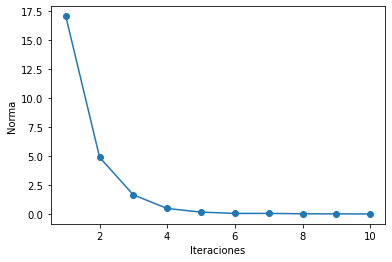

In [83]:
#X1 y X2 Iniciales
x1i = 0.5
x2i = 1.5
eps = .05
#Definicion de variables
x1 = sym.Symbol('x1')
x2 = sym.Symbol('x2')
lam = sym.Symbol('lam')
#Funcion objetivo
f = 8*(x1**2) + 6*(x2 ** 2) + 4*(x1 - 1)*(x2 - 2)


#Calcular gradiente
def gradiente (xn1, xn2):
  gx1,gx2 = sym.diff(f,x1),sym.diff(f,x2)
  a1,a2 = gx1.subs(x1,xn1),gx2.subs(x1,xn1)
  return a1.subs(x2,xn2), a2.subs(x2,xn2)

#Metodo principal: Implementa el grandiente con x1 y x2 iniciales, tolerancia, y parametros
# 10 iteraciones
def metodoGradiente (eps, x1i, x2i, f):
  gradienteInicialx1, gradienteInicialx2 = gradiente (x1i, x2i)
  normaGradiente = math.sqrt((gradienteInicialx1 ** 2) + (gradienteInicialx2 ** 2))
  if normaGradiente < eps:
    print("Minimo en (x1, x2) = (" +str(x10)+", "+str(x20)+") con z = " + str(valorMinimo) )
  else:
    x1n = x1i
    x2n = x2i
    cont = 0
    for i in range(10):
      min = (f.subs(x1,x1n)).subs(x2,x2n)
#       print(min)
      gx1,gx2 = gradiente(x1n, x2n)
#       print(gx1,gx2)
      f1d, f2d = (x1n-lam *gx1, x2n-lam *gx2)
#       print(f1d,f2d)
      aflambda = f.subs(x1,f1d)
#       print(aflambda)
      flambda = aflambda.subs(x2,f2d)
#       print(flambda)
      dflambda = sym.diff(flambda,lam)
#       print(dflambda)
      puntoMaxAux = solve(dflambda, lam)
#       print("Lambda" + str(puntoMaxAux))
      puntoMax = puntoMaxAux[0]
#       print(puntoMax)
      normaGradiente = math.sqrt((gx1 ** 2) + (gx2 ** 2))
      normas.append(normaGradiente)
      print("Norma " + str(normaGradiente))
      if normaGradiente<eps and cont == 0 :
        print("El método converge, mínimo f(x,y): "+str(min))
        cont +=1
      else:
        print ("Iteracion "+ str(i+1)+ " Puntos: "+ str(x1n) + ", " + str(x2n)+ " f(x,y): "+ str(min)+ ".")
        gx1n,gx2n = gradiente(x1n, x2n)
        x1n = x1n - puntoMax*gx1n
        x2n = x2n - puntoMax*gx2n
iteraciones = [1,2,3,4,5,6,7,8,9,10]
normas = []
metodoGradiente(eps, x1i, x2i, f)
plt.scatter(iteraciones,normas)
plt.plot(iteraciones,normas)
plt.axis()

plt.xlabel("Iteraciones")
plt.ylabel("Norma")
plt.show()

        


In [84]:

x = sym.Symbol('x')
y = sym.Symbol('y')
#Funcion objetivo
f = 5 *(x**2) + 5 *(y**2) - x*y - 11*x + 11*y + 11
# Definimos metodo gradiente
def calcularGradiente ():
  gx,gy = sym.diff(f, x),sym.diff(f, y)
  g = gx, gy
  return g
def calcularInversaHessiana ():
  dfx,dfy = sym.diff(f,x),sym.diff(f,y)
#   print(dfx,dfy)
  dfxx,dfyy = sym.diff(dfx,x),sym.diff(dfy,y)
#   print(dfxx,dfyy)
  dfxy = sym.diff(dfx,y)
#   print(dfxy)
  xx,yy = int(dfxx.evalf()),int(dfyy.evalf())
  print(xx,yy)
  xy = int(dfxy.evalf())
#   print(xy)
  matrizHessiana = sym.Matrix([[xx, xy],[xy , yy]])
#   print(matrizHessiana)
  inversa = matrizHessiana **-1
  print("Matriz Hessiana Inversa")
  print(inversa)
  return inversa
#Metodo de condiciones
def condiciones():
  gradx, grady = calcularGradiente()
  puntoCritico = solve([gradx, grady], (x, y))
  print("Punto critico: "+ str(puntoCritico))
calcularInversaHessiana ()
condiciones()


10 10
Matriz Hessiana Inversa
Matrix([[10/99, 1/99], [1/99, 10/99]])
Punto critico: {x: 1, y: -1}


In [117]:
eps = .05
xi,y1 = 0,0
paso = 0.2
x,y = sym.Symbol('x'),sym.Symbol('y')
lam = sym.Symbol('lam') #lambda
#Funcion objetivo
f = 5 *(x**2) + 5 *(y**2) - x*y - 11*x + 11*y + 11
def normaGradiente(xn, yn):
  gradx, grady = calcularGradiente()
  gxn,gyn = float(((gradx.subs(x, xn)).subs(y, yn)).evalf()),float(((grady.subs(x, xn)).subs(y, yn)).evalf())
  n = math.sqrt((gxn **2) + (gyn **2))
  return n

def algoritmoNewton(eps, xninicial, yninicial):
  xn,yn = xninicial,yninicial
  norma = normaGradiente(xn, xn)
  inversaHessiana = calcularInversaHessiana()
  for i in range(10):
    minimo = (f.subs(x,xn)).subs(y,yn)
    norma = normaGradiente(xn, yn)
    print(norma)
    if norma < eps:
      print("El método converge, mínimo: "+str(minimo))
      break
    else:
      print ("Iteracion: "+ str(i+1)+ " Puntos: "+ str(xn) + ", " + str(yn)+ " f(x,y):  "+ str(minimo))
      norma = normaGradiente(xn, yn)
      gradx, grady = calcularGradiente()
      gradxn,gradyn = float(((gradx.subs(x, xninicial)).subs(y, yninicial)).evalf()),float(((grady.subs(x, xninicial)).subs(y, yninicial)).evalf())
#       t = reglaDeArmijo(xn, yn)
#       print("Armijo:" +str(t))
      gradiente = sym.Matrix([gradxn, gradyn])
      xnMatriz = sym.Matrix([xn,yn]) - paso * inversaHessiana * gradiente
      xn, yn = float(xnMatriz [0]), float(xnMatriz[1])
algoritmoNewton(eps, xi, yi)

10 10
Matriz Hessiana Inversa
Matrix([[10/99, 1/99], [1/99, 10/99]])
15.556349186104045
Iteracion: 1 Puntos: 0, 0 f(x,y):  11
12.445079348883237
Iteracion: 2 Puntos: 0.2, -0.2 f(x,y):  7.04000000000000
9.333809511662427
Iteracion: 3 Puntos: 0.4, -0.4 f(x,y):  3.96000000000000
6.222539674441617
Iteracion: 4 Puntos: 0.6000000000000001, -0.6000000000000001 f(x,y):  1.76000000000000
3.1112698372208087
Iteracion: 5 Puntos: 0.8, -0.8 f(x,y):  0.440000000000001
0.0
El método converge, mínimo: 0
